In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-survival/train.csv


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,accuracy_score
df = pd.read_csv("/kaggle/input/titanic-survival/train.csv")

In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df=df.drop(columns=['Ticket','Name','PassengerId','Cabin'])

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df["Embarked"]=df["Embarked"].fillna(df['Embarked']).mode()[0]

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df=df.drop(columns=['SibSp','Parch'])

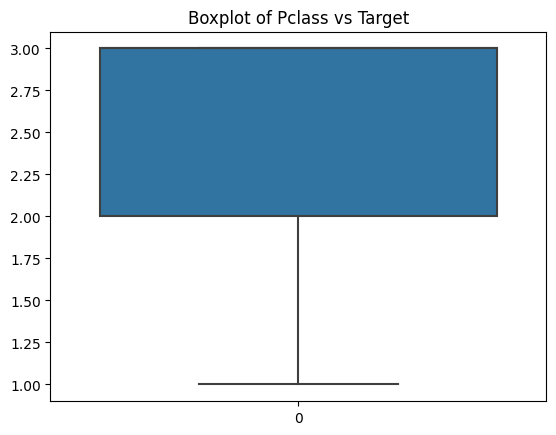

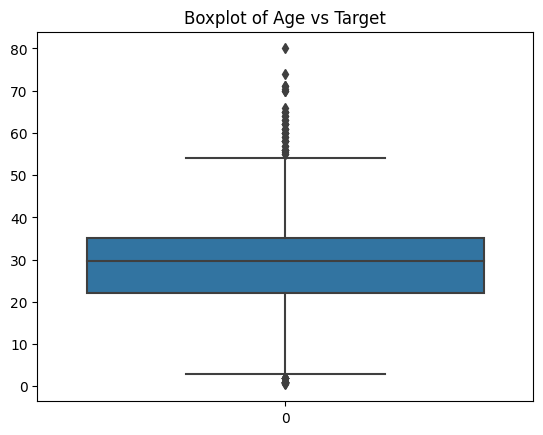

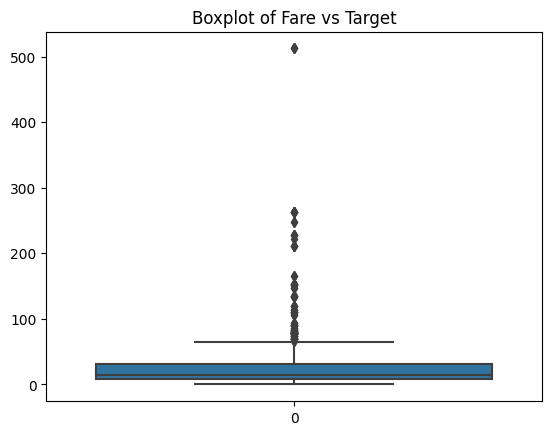

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

features = df.iloc[:, 1:-1]
target = df.iloc[:, -1]

for col in features.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot( df[col])
        plt.title(f"Boxplot of {col} vs Target")
        plt.show()


In [15]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df['Fare'] = df['Fare'].clip(lower_limit, upper_limit)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.000000,7.2500,S,2
1,1,1,female,38.000000,65.6344,S,2
2,1,3,female,26.000000,7.9250,S,1
3,1,1,female,35.000000,53.1000,S,2
4,0,3,male,35.000000,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1
887,1,1,female,19.000000,30.0000,S,1
888,0,3,female,29.699118,23.4500,S,4
889,1,1,male,26.000000,30.0000,S,1


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_array = encoder.fit_transform(df[['Sex']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Sex']))

# Combine with original DataFrame (drop old columns)
df = pd.concat([df.drop(columns=['Sex']), encoded_df], axis=1)

print(df.head())


   Survived  Pclass   Age     Fare Embarked  Family  Sex_male
0         0       3  22.0   7.2500        S       2       1.0
1         1       1  38.0  65.6344        S       2       0.0
2         1       3  26.0   7.9250        S       1       0.0
3         1       1  35.0  53.1000        S       2       0.0
4         0       3  35.0   8.0500        S       1       1.0


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
df['Embarked'].value_counts()

Embarked
S    891
Name: count, dtype: int64

In [20]:
df['Embarked']=0

In [21]:
df

,Survived,Pclass,Age,Fare,Embarked,Family,Sex_male
0,0,3,22.000000,7.2500,0,2,1.0
1,1,1,38.000000,65.6344,0,2,0.0
2,1,3,26.000000,7.9250,0,1,0.0
3,1,1,35.000000,53.1000,0,2,0.0
4,0,3,35.000000,8.0500,0,1,1.0
...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,1.0
887,1,1,19.000000,30.0000,0,1,0.0
888,0,3,29.699118,23.4500,0,4,0.0
889,1,1,26.000000,30.0000,0,1,1.0


In [22]:
df[['Age','Fare']]=sc.fit_transform(df[['Age','Fare']])

In [23]:
df['Fare_per_class'] = df['Fare'] / df['Pclass']

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

# X, y from preprocessed data
X = df.drop(columns=['Survived'])
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual models
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
elastic_net = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=10000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

models = [
    ('Logistic Regression (L2)', log_reg),
    ('Elastic Net Logistic Regression', elastic_net),
    ('Decision Tree', decision_tree)
]

# Train & evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

# Ensemble (Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('elastic_net', elastic_net),
        ('decision_tree', decision_tree)
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)

print(f"Ensemble Accuracy: {ensemble_acc:.4f}")


Logistic Regression (L2) Accuracy: 0.8101
Elastic Net Logistic Regression Accuracy: 0.8101
Decision Tree Accuracy: 0.8101
Ensemble Accuracy: 0.8101


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

# X, y from preprocessed data
X = df.drop(columns=['Survived'])
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual models
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
elastic_net = LogisticRegression(penalty='elasticnet', l1_ratio=0.7, solver='saga', max_iter=10000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

models = [
    ('Logistic Regression (L2)', log_reg),
    ('Elastic Net Logistic Regression', elastic_net),
    ('Decision Tree', decision_tree)
]

# Train & evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

# Ensemble (Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('elastic_net', elastic_net),
        ('decision_tree', decision_tree)
    ],
    voting='soft',
    weights=[2, 1, 0.9]
)

voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {ensemble_acc:.4f}")
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)


Logistic Regression (L2) Accuracy: 0.8101
[[92 13]
 [21 53]]
Elastic Net Logistic Regression Accuracy: 0.8101
[[92 13]
 [21 53]]
Decision Tree Accuracy: 0.7765
[[92 13]
 [27 47]]
Ensemble Accuracy: 0.8212
[[93 12]
 [20 54]]


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 8,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
